Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\rotated_images\rotated_12.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\rotated_images\rotated_120.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\rotated_images\rotated_129_jpg.rf.0ba0c0296a6e3f7d738168914f9b6f4b.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\rotated_images\rotated_13.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\rotated_images\rotated_158.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\rotated_images\rotated_163.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\rotated_images\rotated_165.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images\rotated_images\rotated_168.jpg
Saved rotated image: C:\Users\Reshmi\Capstone-Project\mile

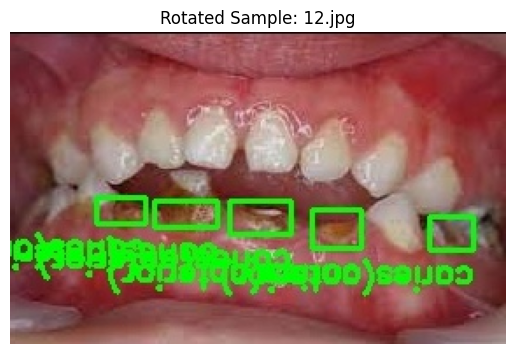

In [2]:
import cv2
import os
import matplotlib.pyplot as plt

# Define image directory (your labeled_images folder)
image_dir = os.path.join(os.getcwd(), "scripts", "data", "labeled_images")

# Get list of all .jpg images inside labeled_images
image_filenames = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Create a directory to save rotated images
base_augmented_dir = r"C:\Users\Reshmi\Capstone-Project\milestone3\Augmented_images"
rotated_save_dir = os.path.join(base_augmented_dir, "rotated_images")
os.makedirs(rotated_save_dir, exist_ok=True)  # Create folder if it doesn't exist

# Process each image
for filename in image_filenames:
    image_path = os.path.join(image_dir, filename)

    # Load the image
    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Failed to load {filename}")
        continue  # Skip to next image

    # Get image dimensions
    height, width = img.shape[:2]

    # Define the center for rotation
    center = (width // 2, height // 2)

    # Define the rotation matrix for 180-degree rotation
    rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=180, scale=1)

    # Apply the rotation
    rotated_img = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))

    # Save the rotated image
    rotated_path = os.path.join(rotated_save_dir, f"rotated_{filename}")
    cv2.imwrite(rotated_path, rotated_img)

    print(f"Saved rotated image: {rotated_path}")

print("Image rotation complete!")

# Display a test rotated image
test_image_path = os.path.join(rotated_save_dir, f"rotated_{image_filenames[0]}")
test_image = cv2.imread(test_image_path)

# Check if test image is loaded
if test_image is not None:
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
    plt.imshow(test_image)
    plt.axis("off")
    plt.title(f"Rotated Sample: {image_filenames[0]}")
    plt.show()
else:
    print("Error: Test image not found for display!")
